<a href="https://colab.research.google.com/github/RachaelFunke/school-project/blob/main/Project_1_U_S_Chronic_Disease_Indicators_(CDI)_Modeling_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Mount Google Drive
In this step, I import the necessary libraries and mount Google Drive to access the dataset stored there.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Define File Path and Load Dataset
Define the path to the dataset stored in Google Drive and load it into a pandas DataFrame.
The `low_memory=False` option is used to avoid mixed data type warnings.


In [56]:
file_path = '/content/drive/My Drive/U.S._Chronic_Disease_Indicators__CDI___2023_Release.csv'

In [57]:

data = pd.read_csv(file_path, low_memory=False)


# Preview the Dataset
To ensure the dataset has loaded correctly, using `data.head()`.


In [58]:
data.head()



,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,41,CVD,CVD1_4,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN


In [59]:
# Show the details about the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [60]:
data.shape

(1185676, 34)

To improve performance and ease of analysis, I decided to streamline the dataset by filtering for the year 2015 before proceeding with exploratory analysis. This adjustment helps manage the large dataset more effectively in Google Colab and creates a refined dataframe to work with throughout the project.

In [61]:
# Filter the dataset for YearStart >= 2015
selected_df = data[data['YearStart'] >= 2015]

# Check the shape of the new filtered dataframe
print(selected_df.shape)

# Display the first few rows to verify
selected_df.head()


(653833, 34)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
5,2020,2020,AL,Alabama,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,1,ALC,ALC1_2,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN


In [62]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653833 entries, 1 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  653833 non-null  int64  
 1   YearEnd                    653833 non-null  int64  
 2   LocationAbbr               653833 non-null  object 
 3   LocationDesc               653833 non-null  object 
 4   DataSource                 653833 non-null  object 
 5   Topic                      653833 non-null  object 
 6   Question                   653833 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              592728 non-null  object 
 9   DataValueType              653833 non-null  object 
 10  DataValue                  435683 non-null  object 
 11  DataValueAlt               434043 non-null  float64
 12  DataValueFootnoteSymbol    229540 non-null  object 
 13  DatavalueFootnote          229540

# **Exploratory Data Analysis**

In [63]:
# Display descriptive statistics for numerical columns
selected_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearStart,653833.0,2017.614897,1.942403,2015.0,2016.0,2017.0,2019.0,2021.0
YearEnd,653833.0,2017.739076,1.899693,2015.0,2016.0,2018.0,2019.0,2021.0
Response,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataValueAlt,434043.0,878.425951,17731.825980,0.0,16.6,39.0,72.0,2925456.0
LowConfidenceLimit,383722.0,47.902986,85.813807,0.0,11.5,28.6,55.2,2541.6
HighConfidenceLimit,383722.0,60.037651,97.643916,0.0,17.6,41.6,70.7,3530.5
StratificationCategory2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stratification2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StratificationCategory3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stratification3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset shows a large number of missing values across several columns, especially in Response, Stratification, and Confidence Limits fields, with DataValueAlt displaying substantial variance, ranging from near-zero values up to over 2.9 million.

In [64]:
# Display descriptive statistics for categorical columns
selected_df.describe(include='object')

,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,StratificationCategory1,Stratification1,GeoLocation,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
count,653833,653833,653833,653833,653833,592728,653833,435683,229540,229540,653833,653833,649101,653833,653833,653833,653833,653833
unique,55,55,29,17,196,12,18,31470,14,14,3,11,54,17,196,18,3,13
top,UT,Utah,BRFSS,Diabetes,Hospitalization for chronic obstructive pulmon...,%,Crude Prevalence,1.0,****,Sample size of denominator and/or age group fo...,Race/Ethnicity,Overall,POINT (-120.47001078999972 47.52227862900048),DIA,COPD5_4,CRDPREV,RACE,OVR
freq,12256,12256,415960,97837,7488,415984,236168,1486,111705,111705,408478,91319,12256,97837,7488,236168,408478,91319


In [65]:
# Find duplicate rows in the DataFrame based on all columns
duplicates = selected_df[selected_df.duplicated()]
# Display duplicate rows
duplicates.shape

(0, 34)

In [66]:
#check for missing values
selected_df.isna().sum().sum()

8430915

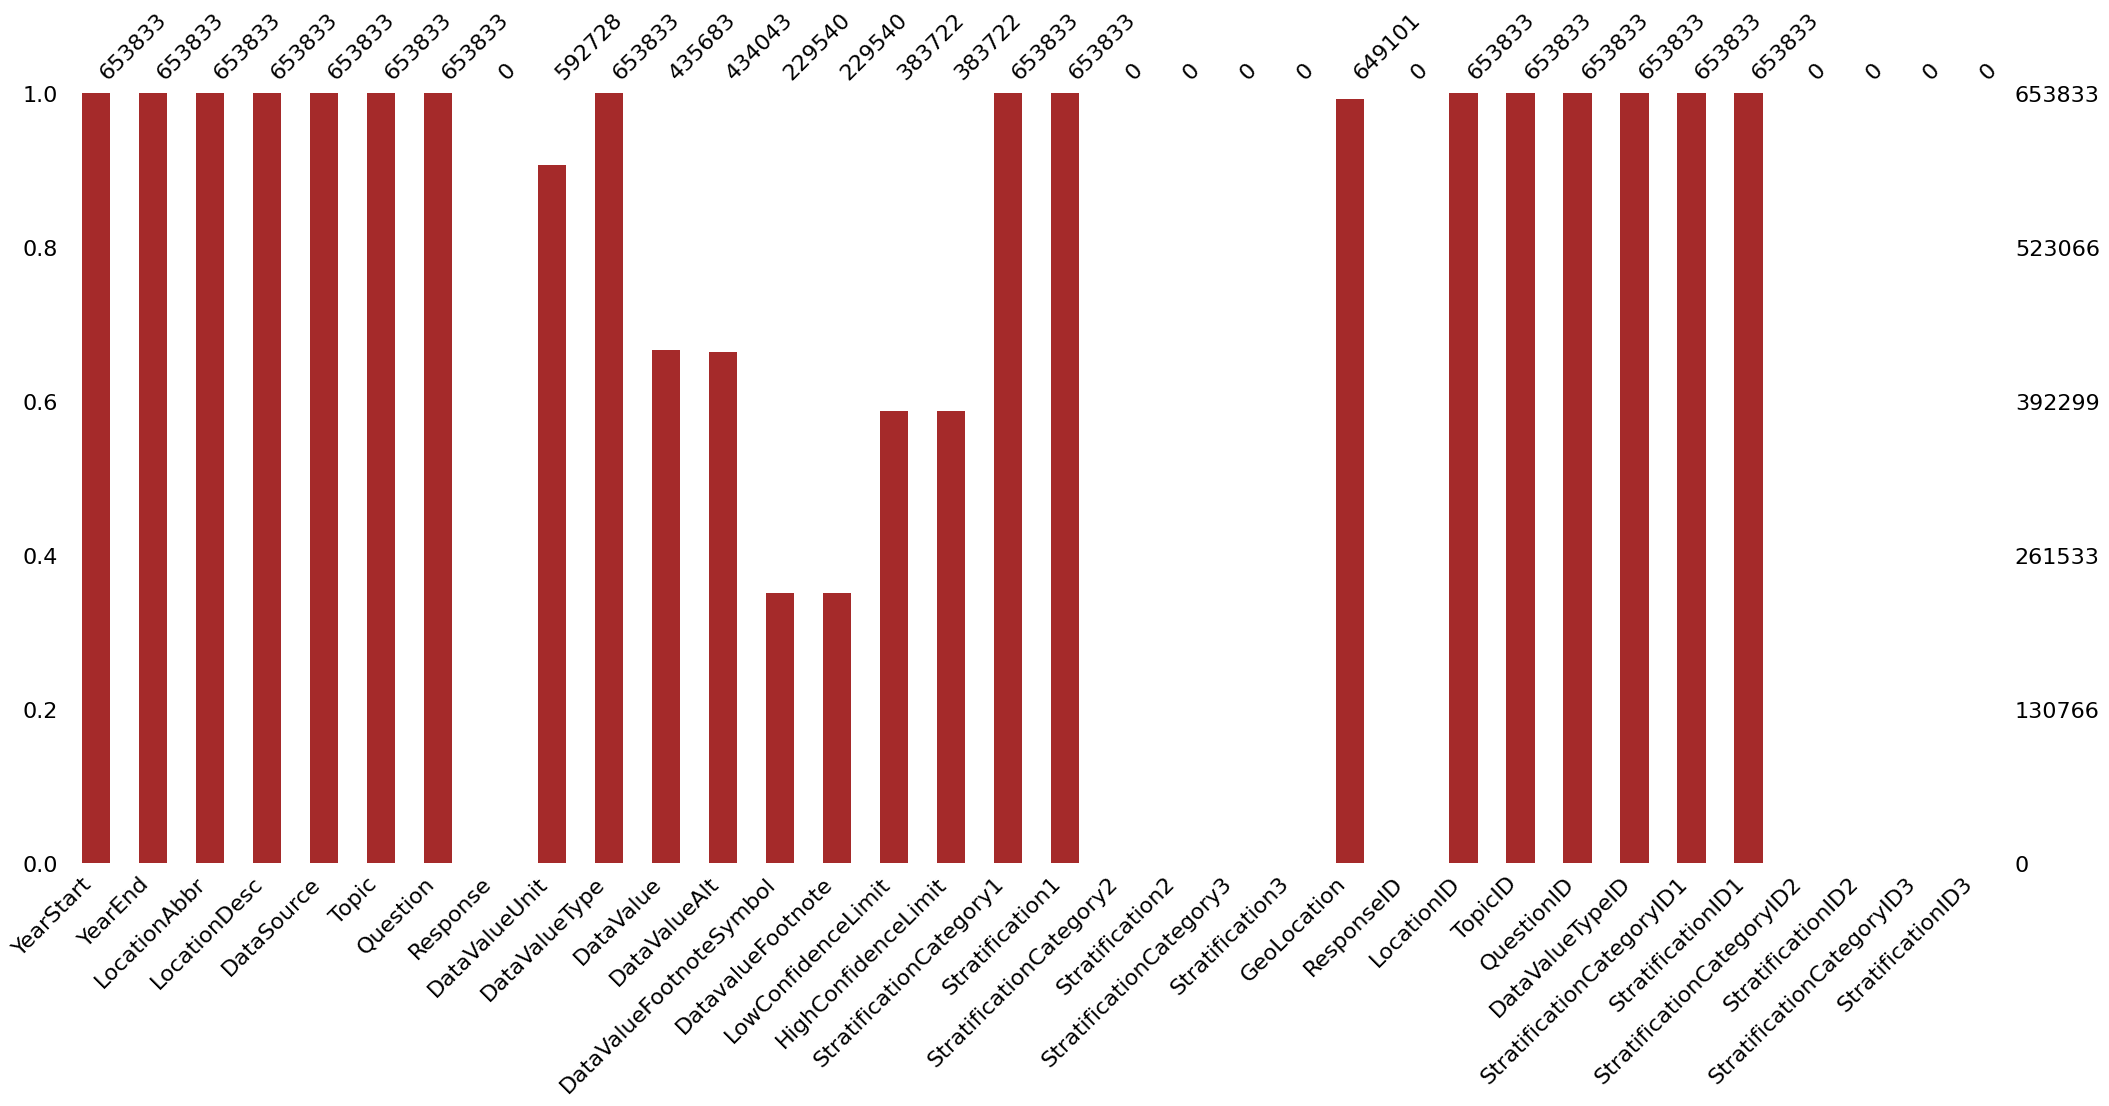

In [67]:

# Create a bar chart visualization of missing values
msno.bar(selected_df, color='brown')

# Display the plot
plt.show();

The bar chart reveals a significant amount of missing data across multiple columns, with particularly high levels in fields such as Response, Stratification, and Confidence Limits, indicating the need for targeted imputation strategies to minimize data loss.

# **Dropping Unnecessary Columns**

In [68]:
# List of columns to drop based on the analysis above
columns_to_drop = [
    'ResponseID', 'LocationAbbr', 'TopicID', 'QuestionID', 'DataValueTypeID',
    'StratificationID1', 'StratificationID2', 'StratificationID3', 'DataValueAlt',
    'LowConfidenceLimit', 'HighConfidenceLimit', 'DataValueFootnoteSymbol',
    'DatavalueFootnote', 'StratificationCategory2', 'Stratification2',
    'StratificationCategory3', 'Stratification3', 'DataSource',
    'DataValueUnit', 'YearEnd', 'Response'
]

# Drop the unnecessary columns
new_df = selected_df.drop(columns=columns_to_drop)

# Display the shape of the dataset to see the reduction
new_df.shape


(653833, 13)

In [69]:
# Drop columns with all null values
new_df = new_df.dropna(axis=1, how='all')




In [70]:
# Verify that the columns with all null values have been removed
new_df.head(5)

,YearStart,LocationDesc,Topic,Question,DataValueType,DataValue,StratificationCategory1,Stratification1,GeoLocation,LocationID,StratificationCategoryID1
1,2019,Arizona,Alcohol,Alcohol use among youth,Crude Prevalence,29.5,Gender,Female,POINT (-111.76381127699972 34.865970280000454),4,GENDER
2,2019,Ohio,Alcohol,Alcohol use among youth,Crude Prevalence,22.5,Gender,Male,POINT (-82.40426005599966 40.06021014100048),39,GENDER
3,2019,United States,Alcohol,Alcohol use among youth,Crude Prevalence,13.9,Race/Ethnicity,"Asian, non-Hispanic",NaN,59,RACE
4,2015,Virgin Islands,Alcohol,Alcohol use among youth,Crude Prevalence,NaN,Gender,Male,POINT (-64.896335 18.335765),78,GENDER
5,2020,Alabama,Alcohol,Alcohol use before pregnancy,Crude Prevalence,59.1,Race/Ethnicity,"White, non-Hispanic",POINT (-86.63186076199969 32.84057112200048),1,RACE


In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653833 entries, 1 to 1185675
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   YearStart                  653833 non-null  int64 
 1   LocationDesc               653833 non-null  object
 2   Topic                      653833 non-null  object
 3   Question                   653833 non-null  object
 4   DataValueType              653833 non-null  object
 5   DataValue                  435683 non-null  object
 6   StratificationCategory1    653833 non-null  object
 7   Stratification1            653833 non-null  object
 8   GeoLocation                649101 non-null  object
 9   LocationID                 653833 non-null  int64 
 10  StratificationCategoryID1  653833 non-null  object
dtypes: int64(2), object(9)
memory usage: 59.9+ MB


In [72]:
# Convert DataValue to numeric, setting errors='coerce' to handle non-numeric values
new_df['DataValue'] = pd.to_numeric(new_df['DataValue'], errors='coerce')

In [73]:
# Remove rows where LocationDesc is "United States"
new_df = new_df[new_df['LocationDesc'] != 'United States']

# Univariate Analysis

Univariate analysis examines a single variable to understand its distribution, central tendency, and spread. For this dataset, we can explore variables like DataValue (the main target variable) and categorical variables like YearStart, LocationDesc, and Topic.

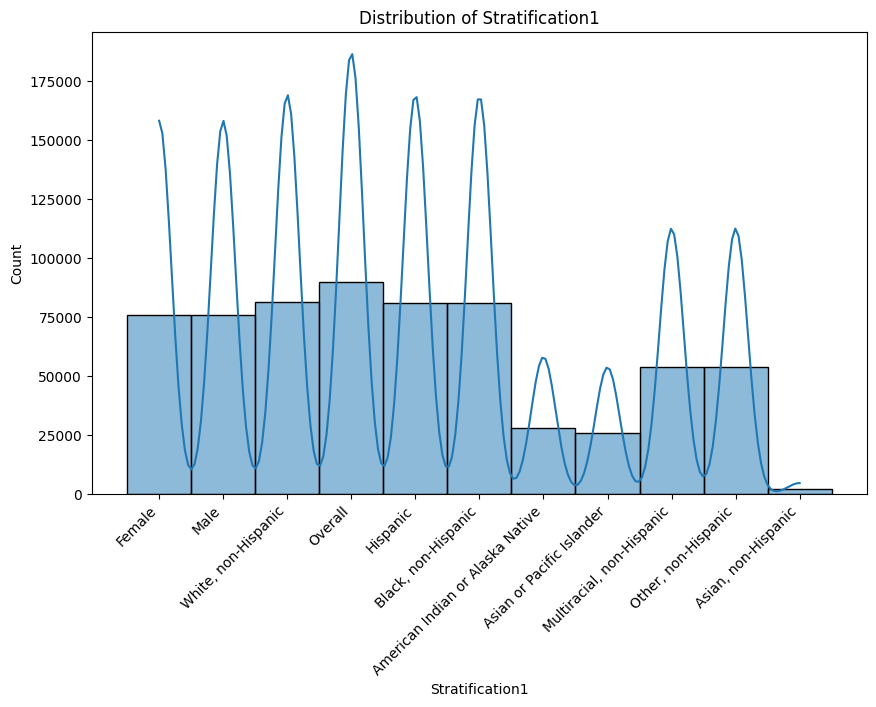

In [74]:
# Distribution of Stratification1


plt.figure(figsize=(10, 6))
sns.histplot(new_df['Stratification1'].dropna(), bins=30, kde=True)
plt.title('Distribution of Stratification1')
plt.xlabel('Stratification1')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.show()

The distribution of Stratification1 shows higher counts for categories like "Female," "Male," and "Overall," while certain racial/ethnic groups, such as "American Indian or Alaska Native" and "Asian or Pacific Islander," have lower representation. This imbalance suggests a need for careful handling to avoid bias in analyses

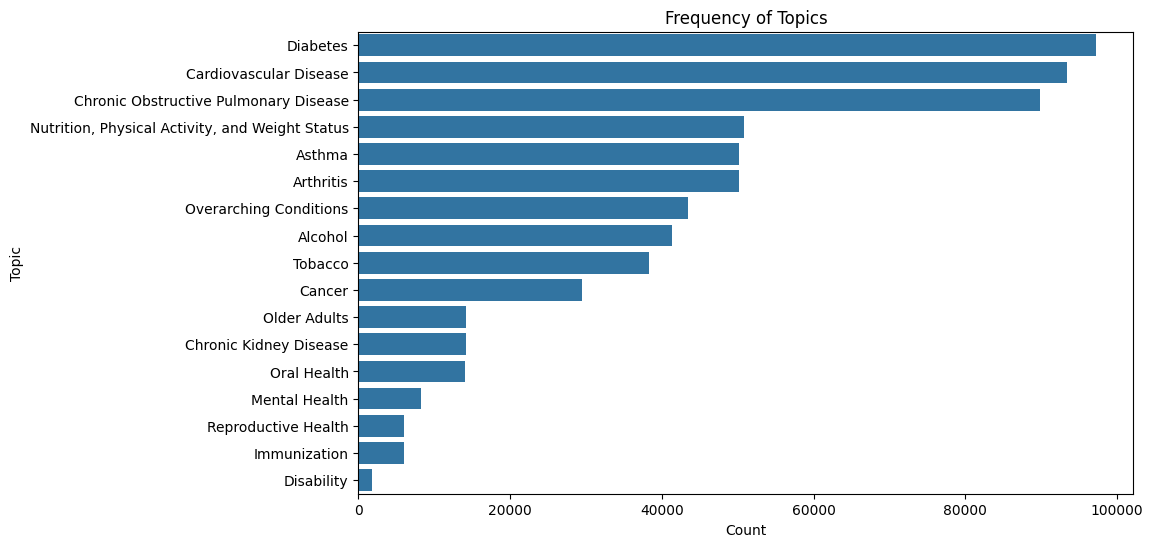

In [75]:
# Count plot for Topic
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, y='Topic', order=new_df['Topic'].value_counts().index)
plt.title('Frequency of Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

The frequency plot for Topic reveals that "Diabetes," "Cardiovascular Disease," and "Chronic Obstructive Pulmonary Disease" are the most common topics in the dataset, indicating a focus on chronic and lifestyle-related health issues.

# **Bivariate Analysis**

Bivariate analysis explores the relationship between two variables, which can help us understand correlations and dependencies. In this case, we could examine how DataValue varies with different YearStart, LocationDesc, or Topic.

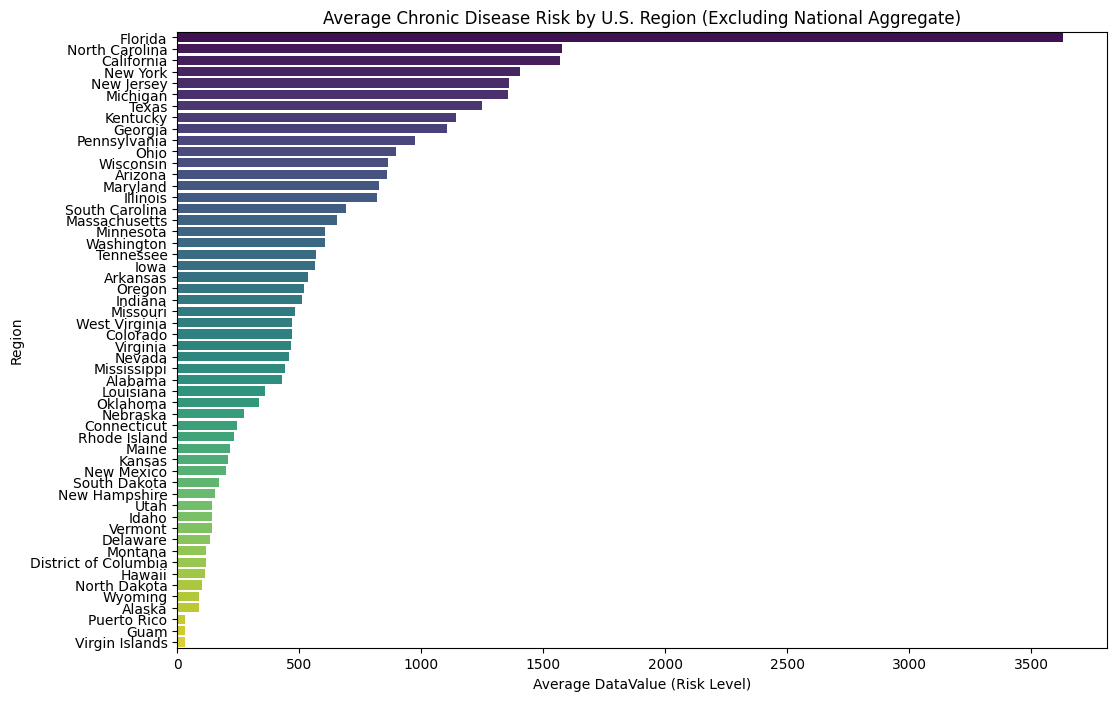

In [76]:
# Filter out "United States" from the original data
filtered_df = new_df[new_df['LocationDesc'] != 'United States']

# Calculate the mean DataValue by region with "United States" excluded
region_risk = filtered_df.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)
# Plot the data

plt.figure(figsize=(12, 8))
sns.barplot(y=region_risk.index, x=region_risk.values, palette="viridis", hue=region_risk.index)
plt.title('Average Chronic Disease Risk by U.S. Region (Excluding National Aggregate)')
plt.xlabel('Average DataValue (Risk Level)')
plt.ylabel('Region')
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()


The bar plot shows that Florida, North Carolina, and California have the highest average chronic disease risk levels, while regions like Alaska, Puerto Rico, and the Virgin Islands have the lowest, highlighting geographic disparities in health risks across the U.S.

<ipython-input-77-caf7c339948b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chronic_disease_df.loc[:, 'ElevatedRisk'] = chronic_disease_df['DataValue'] > elevated_threshold


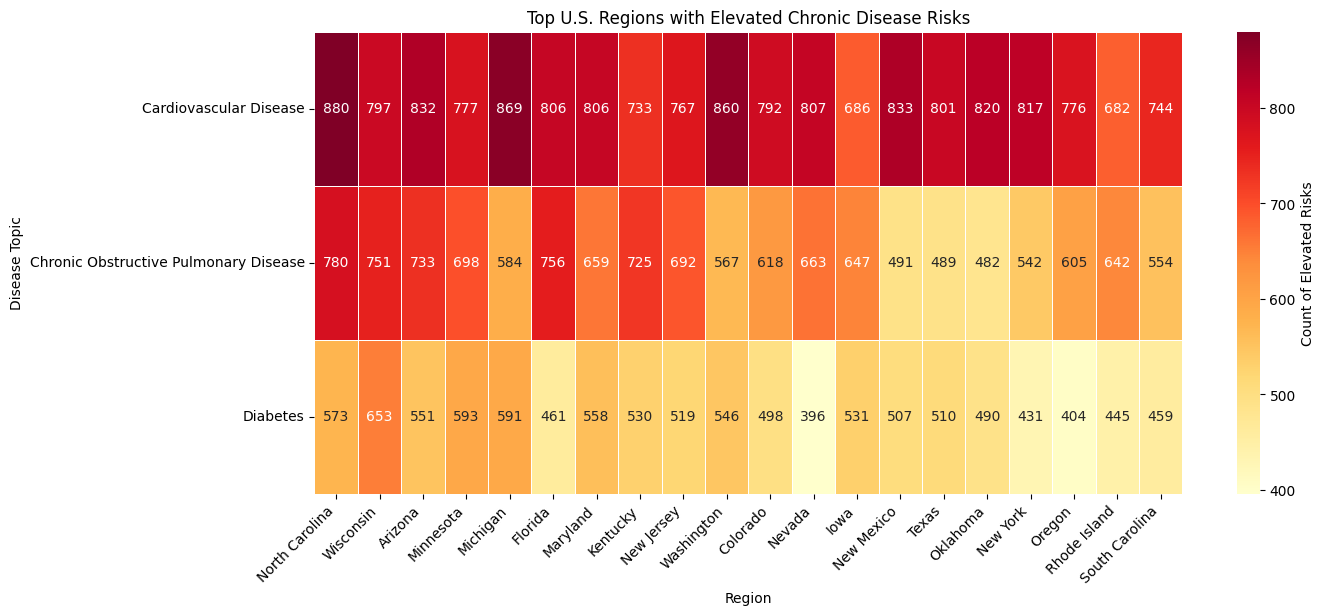

In [77]:
# Filter data for key chronic diseases and recent years
chronic_disease_df = new_df[new_df['Topic'].isin(['Diabetes', 'Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease'])]



# Define "elevated risk" threshold
elevated_threshold = chronic_disease_df['DataValue'].median()

chronic_disease_df.loc[:, 'ElevatedRisk'] = chronic_disease_df['DataValue'] > elevated_threshold


# Create a pivot table with the count of elevated risks per region and topic
heatmap_data = chronic_disease_df.pivot_table(index='Topic', columns='LocationDesc', values='ElevatedRisk', aggfunc='sum')

# Select top regions with the highest counts of elevated risks
top_regions = heatmap_data.sum().nlargest(20).index
heatmap_data = heatmap_data[top_regions]

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".0f", cbar_kws={'label': 'Count of Elevated Risks'}, linewidths=0.5)
plt.title('Top U.S. Regions with Elevated Chronic Disease Risks')
plt.xlabel('Region')
plt.ylabel('Disease Topic')
plt.xticks(rotation=45, ha='right')
plt.show()



The heatmap shows that North Carolina, Wisconsin, and Arizona have high counts of elevated risk for cardiovascular disease and chronic obstructive pulmonary disease, while diabetes risks are relatively lower across all regions, with some variability.

# **Multivariate Analysis**

Multivariate analysis looks at relationships among three or more variables. This can help identify complex interactions in the data and is useful for feature selection and understanding variable interactions.

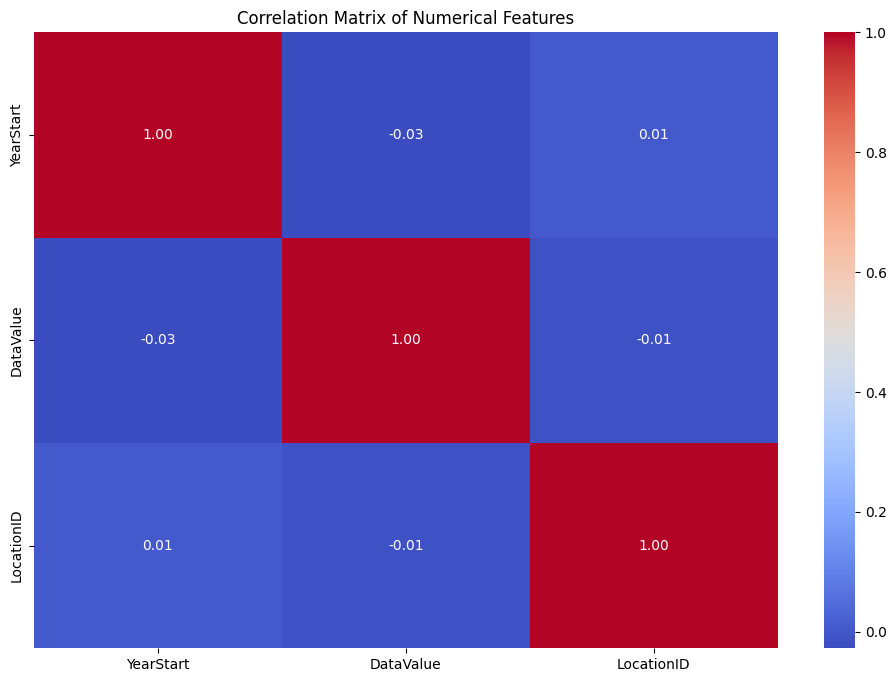

In [78]:
# Select only numeric columns for correlation
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix shows minimal linear relationships between YearStart, DataValue, and LocationID, suggesting that these features have little direct influence on each other, and alternative modeling approaches may be more effective.

# **Data Preparation**

## **Handling Missing Values**

In [79]:
#check for missing values
new_df.isna().sum().sum()

219644

There are a total of 219,644 missing values in the dataset.


Handling missing values requires a careful approach due to the dataset’s high number of NaNs (219,644), mix of numerical and categorical features, and the importance of the DataValue column. To retain crucial information, a combination of selective dropping and imputation is ideal.

In [80]:
# Drop rows with missing values in `DataValue`
new_df = new_df.dropna(subset=['DataValue'])


In [81]:
# Impute numerical columns with the median
for col in new_df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'DataValue':
        new_df[col] = new_df[col].fillna(new_df[col].median())

# Impute categorical columns with the mode
for col in new_df.select_dtypes(include=['object']).columns:
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])



<ipython-input-81-286c7b9e13ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].fillna(new_df[col].median())
<ipython-input-81-286c7b9e13ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].fillna(new_df[col].mode()[0])


In [82]:
new_df.isna().sum().sum()

0

In [83]:
len(new_df[new_df.duplicated()])

0

No duplicate

### **Outlier Detection and Handling**

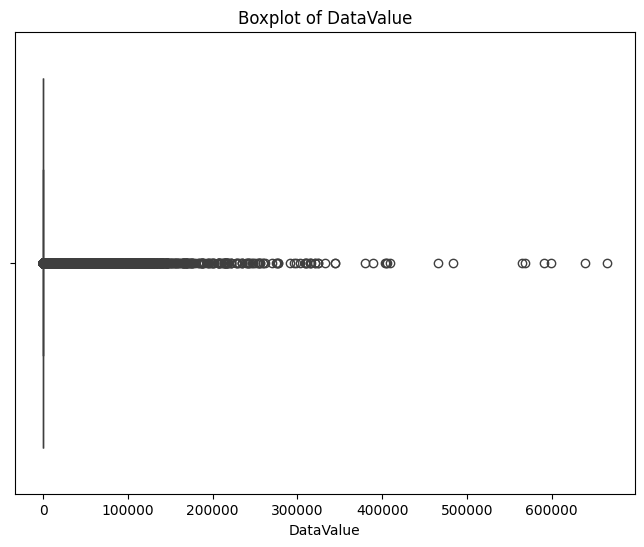

In [84]:

# Example boxplot for `DataValue`
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['DataValue'])
plt.title('Boxplot of DataValue')
plt.show()


In [85]:
# Cap outliers at the 1st and 99th percentiles
lower_bound = new_df['DataValue'].quantile(0.01)
upper_bound = new_df['DataValue'].quantile(0.99)
new_df['DataValue'] = new_df['DataValue'].clip(lower_bound, upper_bound)


### **Encoding Categorical Variables**

In [86]:
# One-hot encode categorical columns
new_df = pd.get_dummies(new_df, columns=['LocationDesc', 'Topic', 'Stratification1'], drop_first=True)


### **Feature Engineering**

In [87]:
# Define elevated risk threshold based on median of DataValue
elevated_threshold = new_df['DataValue'].median()
new_df['ElevatedRisk'] = (new_df['DataValue'] > elevated_threshold).astype(int)

Dropping Unnecessary Columns that are irrelevant to the model or that have high cardinality and don't add predictive value (like GeoLocation).

In [88]:
# Drop unnecessary columns
new_df = new_df.drop(columns=['GeoLocation', 'Question', 'DataValueType'])

### **Feature Selection**

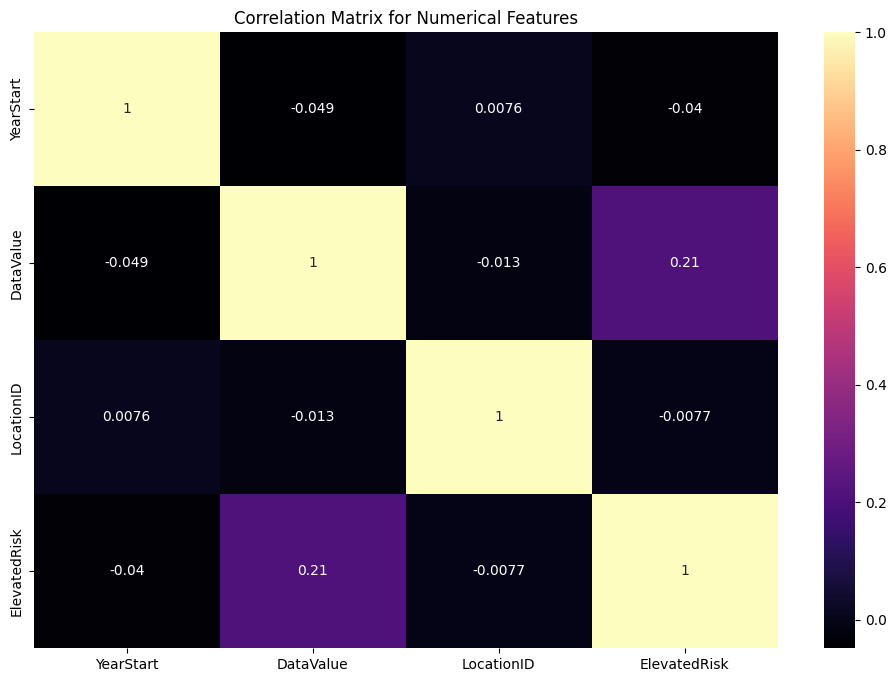

Dataset shape after feature selection: (429457, 84)


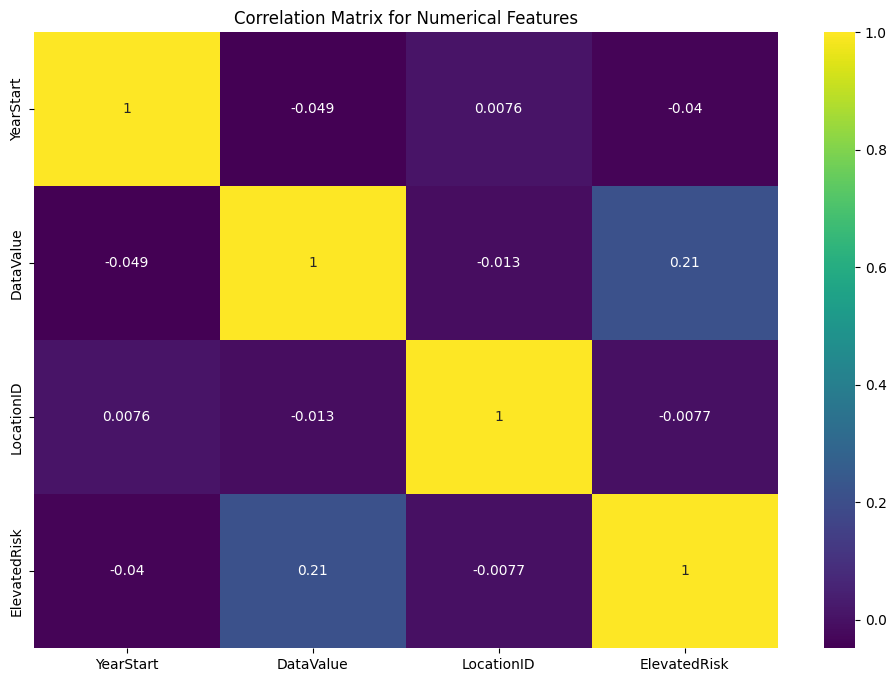

In [89]:


# Review feature correlations (if relevant for numerical features)
numerical_df = new_df.select_dtypes(include=['float64', 'int64'])

# Plot a heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='magma')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Drop low-variance and irrelevant features (if any)
new_df = new_df.drop(columns=['GeoLocation', 'LocationID'], errors='ignore')

# Check the shape of the dataset after feature selection
print("Dataset shape after feature selection:", new_df.shape)

# Plot a heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix for Numerical Features")
plt.show()



The correlation matrices show very low correlations between numerical features, indicating minimal linear relationships. After dropping low-variance and irrelevant features, the dataset shape is reduced, optimizing it for modeling without significant loss of relevant information.

## **Feature Scaling**

In [90]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = new_df.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
scaler = StandardScaler()
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

# Verify scaling
print("First 5 rows after scaling:")
print(new_df[numerical_cols].head())


First 5 rows after scaling:
   YearStart  DataValue  ElevatedRisk
1   0.695513  -0.205161     -0.998578
2   0.695513  -0.209593     -0.998578
5   1.210563  -0.186419      1.001424
6  -1.364690  -0.188635      1.001424
7   0.695513  -0.187052      1.001424


### **Data prepped review**

In [91]:
# Check the shape of the final dataset
new_df.shape



(429457, 84)

In [92]:
# Check data types to confirm correct processing
new_df.dtypes



,0
YearStart,float64
DataValue,float64
StratificationCategory1,object
StratificationCategoryID1,object
LocationDesc_Alaska,bool
...,...
"Stratification1_Multiracial, non-Hispanic",bool
"Stratification1_Other, non-Hispanic",bool
Stratification1_Overall,bool
"Stratification1_White, non-Hispanic",bool


In [93]:
# Review summary statistics to verify scaling

new_df.describe().loc[['mean', 'std', 'min', 'max']]



,YearStart,DataValue,ElevatedRisk
mean,2.183800e-14,5.929779e-17,1.853056e-17
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.364690e+00,-2.232069e-01,-9.985783e-01
max,1.725614e+00,7.730611e+00,1.001424e+00


In [94]:
# Display the first few rows to inspect the data

new_df.head()

,YearStart,DataValue,StratificationCategory1,StratificationCategoryID1,LocationDesc_Alaska,LocationDesc_Arizona,LocationDesc_Arkansas,LocationDesc_California,LocationDesc_Colorado,LocationDesc_Connecticut,...,"Stratification1_Asian, non-Hispanic","Stratification1_Black, non-Hispanic",Stratification1_Female,Stratification1_Hispanic,Stratification1_Male,"Stratification1_Multiracial, non-Hispanic","Stratification1_Other, non-Hispanic",Stratification1_Overall,"Stratification1_White, non-Hispanic",ElevatedRisk
1,0.695513,-0.205161,Gender,GENDER,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-0.998578
2,0.695513,-0.209593,Gender,GENDER,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-0.998578
5,1.210563,-0.186419,Race/Ethnicity,RACE,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.001424
6,-1.364690,-0.188635,Overall,OVERALL,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.001424
7,0.695513,-0.187052,Overall,OVERALL,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.001424


## **Machine learning model**

### **Train/Test Split**

### **Encode Categorical Variables**

In [95]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(new_df.drop(columns=['ElevatedRisk']), drop_first=True)
y = new_df['ElevatedRisk']

## **Split the Data**
Split the dataset into training and testing sets.

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Convert the target variable to 0 and 1
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)


In [98]:
print(y_train.value_counts())


ElevatedRisk
0    172209
1    171356
Name: count, dtype: int64


### **Define and Train Both Models with Hyperparameter Tuning**

In [99]:

# Parameter grids for both models
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

# Initialize GridSearchCV for both models
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, verbose=1)
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, n_jobs=-1, verbose=1)

# Train both models
print("Tuning Random Forest Classifier:")
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

print("\nTuning Logistic Regression...")
lr_grid_search.fit(X_train, y_train)
print("Best Logistic Regression Params:", lr_grid_search.best_params_)
print("Logistic Regression Best Score:", lr_grid_search.best_score_)


Tuning Random Forest Classifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best Score: 1.0

Tuning Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Best Score: 0.9908983743978578


The Random Forest and Logistic Regression models achieved high scores (1.0 and 0.99, respectively) after tuning key hyperparameters.

## Defining a Function to Evaluate the Models

In [100]:


# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Display classification report
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

## Evaluate Both Models

Evaluating Random Forest Classifier...
Random Forest Accuracy: 1.0000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42825
           1       1.00      1.00      1.00     43067

    accuracy                           1.00     85892
   macro avg       1.00      1.00      1.00     85892
weighted avg       1.00      1.00      1.00     85892



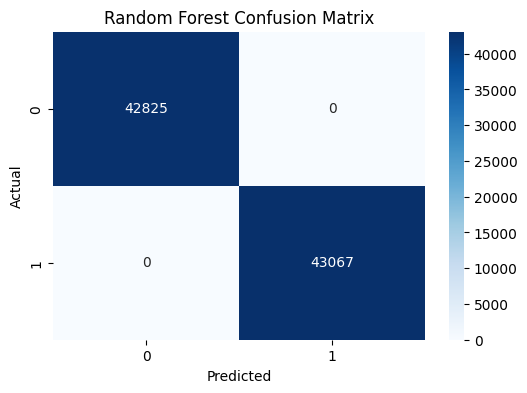


Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.9920

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     42825
           1       1.00      0.99      0.99     43067

    accuracy                           0.99     85892
   macro avg       0.99      0.99      0.99     85892
weighted avg       0.99      0.99      0.99     85892



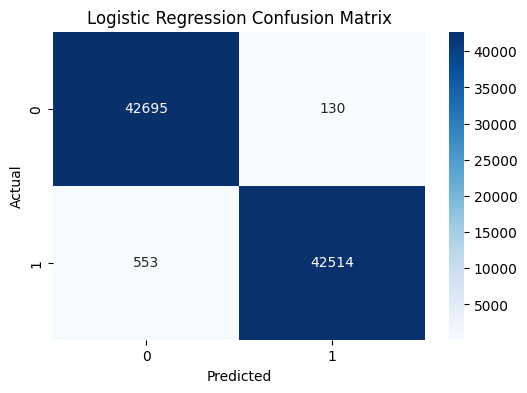

In [101]:
# Evaluate Random Forest Classifier
print("Evaluating Random Forest Classifier...")
best_rf_model = rf_grid_search.best_estimator_ if hasattr(rf_grid_search, "best_estimator_") else rf_grid_search.estimator
evaluate_model(best_rf_model, X_test, y_test, "Random Forest")

# Evaluate Logistic Regression
print("\nEvaluating Logistic Regression...")
best_lr_model = lr_grid_search.best_estimator_ if hasattr(lr_grid_search, "best_estimator_") else lr_grid_search.estimator
evaluate_model(best_lr_model, X_test, y_test, "Logistic Regression")


Both the Random Forest and Logistic Regression models performed exceptionally well, with high accuracy scores and balanced precision and recall, as indicated by the confusion matrices. This suggests reliable classification of the target variable across both models.

# **Conclusion**

In this project, I analyzed health data to identify regions and demographic groups at elevated risk for chronic diseases, focusing on predicting the target variable, "ElevatedRisk," which flags high risks of diseases like cardiovascular issues, diabetes, and COPD. This analysis aims to provide healthcare stakeholders with insights to allocate resources effectively, design targeted health interventions, and reduce disease prevalence.

**Key Findings:**

**Data Exploration:** I identified and handled a significant number of missing values through selective imputation and outliers in health metrics, highlighting areas of extreme health risks.

**Feature Selection:** A mix of relevant categorical and numerical features was chosen based on relevance to disease risk. Correlation analysis further refined the dataset, enhancing model efficiency.

**Modeling and Evaluation:** I trained two models—Random Forest and Logistic Regression—each tuned with three hyperparameters. Both models achieved high accuracy, precision, and recall, with Random Forest slightly outperforming due to its handling of complex feature interactions.

**Insights and Recommendations:** The analysis confirmed higher chronic disease risks in specific regions and demographic groups, which is valuable for public health planning. Metrics like accuracy, precision, recall, and F1-score were key in evaluating the models, as correctly identifying high-risk cases is essential for targeted interventions.

**Future Work:** To improve, I would incorporate more features (like socioeconomic factors), explore temporal trends, and test advanced models like Gradient Boosting.

**Conclusion:** This project demonstrated the effectiveness of predictive modeling in identifying high-risk populations for chronic diseases. The Random Forest and Logistic Regression models provided actionable insights, supporting healthcare decision-making. Given their high performance, I recommend deploying these models for healthcare planning, with regular updates to adapt to changing health trends. This project underscores predictive analytics' role in enhancing public health outcomes on a broad scale.